# Demostración HACEB

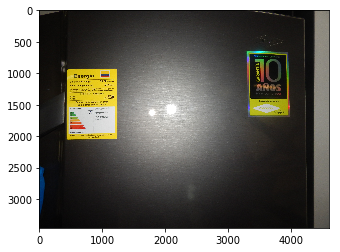

In [1]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np
#Leer y plotear la imagen de trabajo
img = cv2.imread("res/nevera.jpg", cv2.IMREAD_COLOR)
img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [5]:
img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]
img_lab  = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img_L = img_lab[:,:,0]
img_A =  img_lab[:,:,1]
img_B = img_lab[:,:,2]
#Canal RGB vs LAB
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(28, 15))
fig.suptitle('RBG vs LAB', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(img_R, cmap='Reds', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(img_G, cmap='Greens', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(img_B, cmap='Blues', aspect='auto')
ax4.set_title('Canal Luminosidad del LAB')
ax4.imshow(img_L, cmap='gray', aspect='auto')
ax5.set_title('Canal A* del LAB')
ax5.imshow(img_A, cmap='gray', aspect='auto')
ax6.set_title('Canal B* del LAB')
ax6.imshow(img_B, cmap='gray', aspect='auto')

NameError: name 'cv2' is not defined

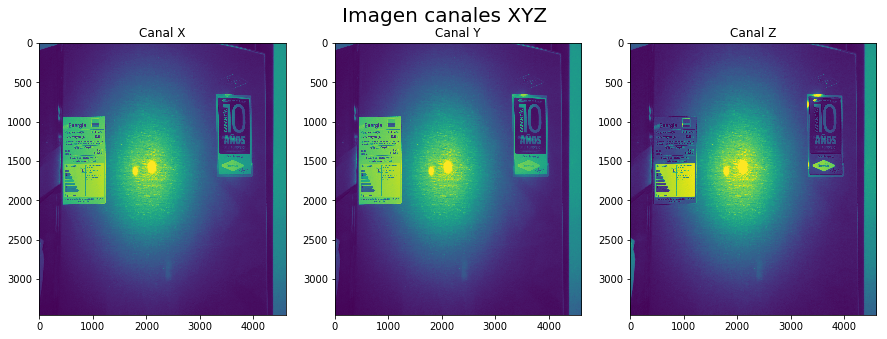

In [3]:
img_xyz  = cv2.cvtColor(img, cv2.COLOR_BGR2XYZ)
img_X = img_xyz[:,:,0]
img_Y =  img_xyz[:,:,1]
img_Z = img_xyz[:,:,2]
#Canal XYZ
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 5))
fig.suptitle('Imagen canales XYZ', fontsize=20)
ax1.set_title('Canal X')
ax1.imshow(img_X, aspect='auto')
ax2.set_title('Canal Y')
ax2.imshow(img_Y,  aspect='auto')
ax3.set_title('Canal Z')
ax3.imshow(img_Z,  aspect='auto')


C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


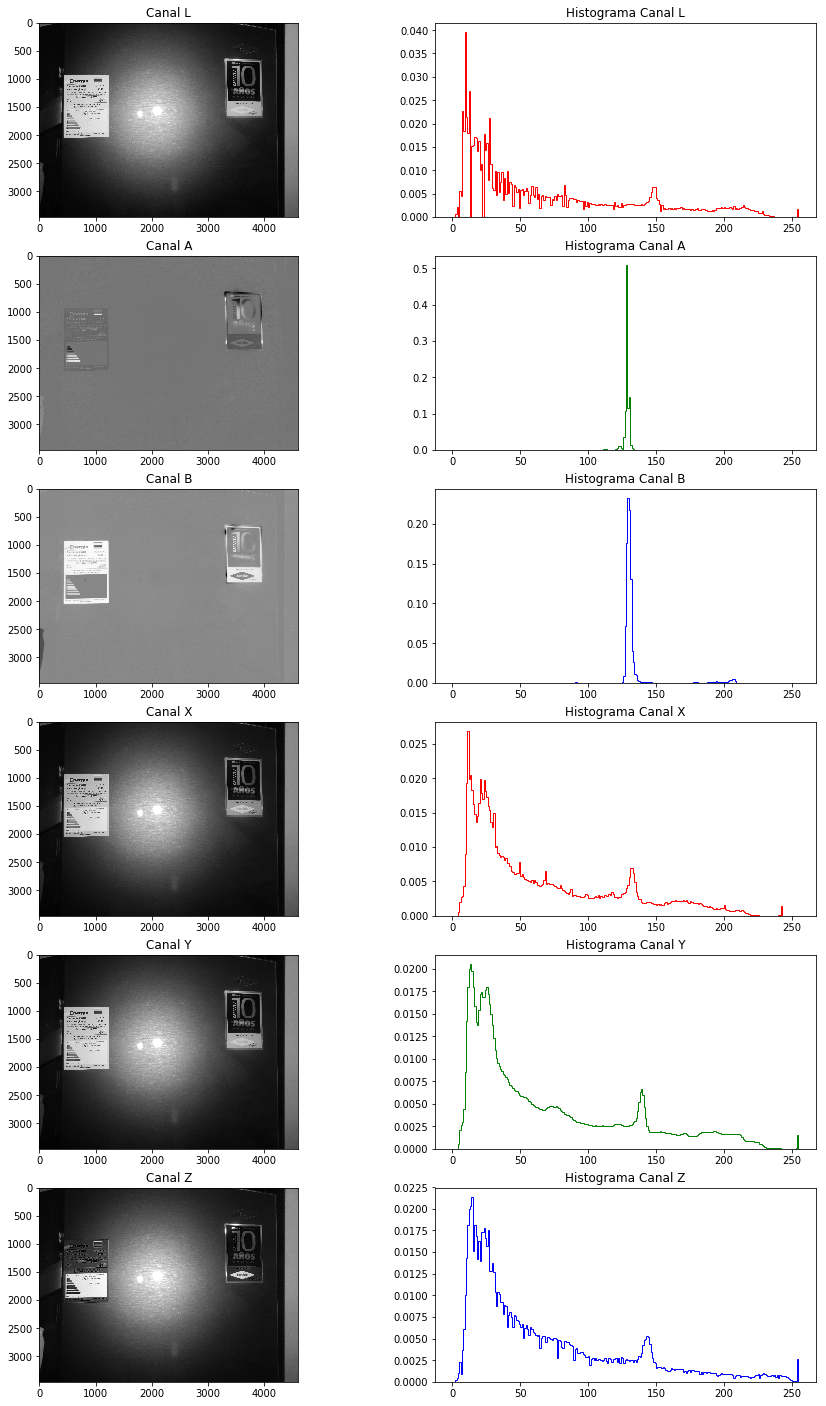

In [4]:
fig, arreglo_plots = plt.subplots(6,2, figsize=(15, 25))
colors = ('r','g','b')
#Canal LAB
arreglo_plots[0,0].set_title('Canal L')
arreglo_plots[0,0].imshow(img_L, cmap="gray")
arreglo_plots[0,1].set_title('Histograma Canal L')
img_array_i = img_lab[:,:,0].ravel()
arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[0])

arreglo_plots[1,0].set_title('Canal A')
arreglo_plots[1,0].imshow(img_A, cmap="gray")
arreglo_plots[1,1].set_title('Histograma Canal A')
img_array_i = img_lab[:,:,1].ravel()
arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[1])
    
arreglo_plots[2,0].set_title('Canal B')
arreglo_plots[2,0].imshow(img_B, cmap="gray")
arreglo_plots[2,1].set_title('Histograma Canal B')
img_array_i = img_lab[:,:,2].ravel()
arreglo_plots[2,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[2])

#Canal XYZ
arreglo_plots[3,0].set_title('Canal X')
arreglo_plots[3,0].imshow(img_X, cmap="gray")
arreglo_plots[3,1].set_title('Histograma Canal X')
img_array_i = img_xyz[:,:,0].ravel()
arreglo_plots[3,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[0])

arreglo_plots[4,0].set_title('Canal Y')
arreglo_plots[4,0].imshow(img_Y, cmap="gray")
arreglo_plots[4,1].set_title('Histograma Canal Y')
img_array_i = img_xyz[:,:,1].ravel()
arreglo_plots[4,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[1])
    
arreglo_plots[5,0].set_title('Canal Z')
arreglo_plots[5,0].imshow(img_Z, cmap="gray")
arreglo_plots[5,1].set_title('Histograma Canal Z')
img_array_i = img_xyz[:,:,2].ravel()
arreglo_plots[5,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[2]);

# Se escoge la imagen del canal B del espacio de color LAB

In [7]:
print(np.max(img_L))

255


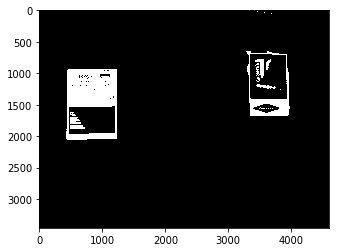

In [6]:
ret,thresh2 = cv2.threshold(img_B,150,255,cv2.THRESH_BINARY)
plt.imshow(thresh2, cmap='gray')

C:\Users\user\Anaconda3\lib\site-packages\skimage\morphology\misc.py:206: UserWarning: the min_size argument is deprecated and will be removed in 0.16. Use area_threshold instead.
  warn("the min_size argument is deprecated and will be removed in " +


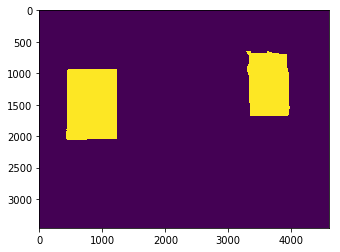

In [7]:
from skimage import morphology as morph

#selem = morph.rectangle(100,100)
#res = morph.closing(thresh2, selem)
#plt.imshow(res)
thresh2 = thresh2/255
res = morph.remove_small_holes(thresh2.astype(bool), min_size = 1000000)
res = morph.remove_small_objects(res, min_size = 2000)
plt.imshow(res)

C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


Numero de etiquetas detectadas: 2


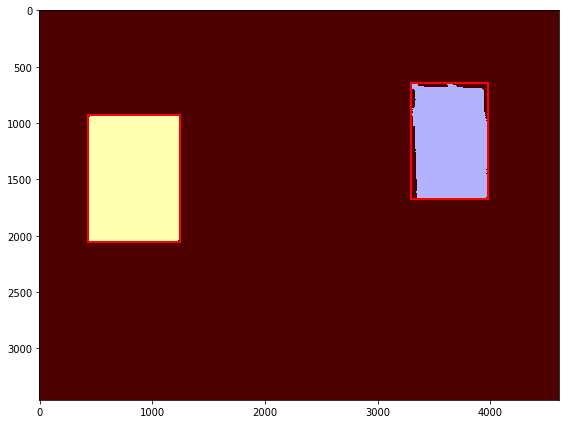

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


image = res

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)
i = 0
for region in regionprops(label_image):
    i += 1
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle 
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

#ax.set_axis_off()
plt.tight_layout()
print('Numero de etiquetas detectadas: ' + str(i))
plt.show();